In [1]:
# importing all the required libraries

import pandas as pd
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, roc_auc_score, mean_absolute_error, mean_squared_error
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import scipy.stats as stats

from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler

#new imports from 16/07/2024
import random

Hour : Hours in ICU

HR:A normal resting heart rate for adults ranges from 60 to 100 beats per minute. Generally, a lower heart rate at rest implies more efficient heart function and better cardiovascular fitness. For example, a well-trained athlete might have a normal resting heart rate closer to 40 beats per minute.

O2Sat: A healthy oxygen saturation level ranges between 95% and 100% . If a person's levels drop below this range, they may experience symptoms associated with a lack of oxygen, such as trouble breathing and confusion.

Temp: The average normal body temperature is generally accepted as 98.6°F (37°C). Some studies have shown that the "normal" body temperature can have a wide range, from 97°F (36.1°C) to 99°F (37.2°C). A temperature over 100.4°F (38°C) most often means you have a fever caused by an infection or illness.

SBP: Patients were categorized based on their mean SBP level: very low–normal (<120 mm Hg), low-normal (120-<130 mm Hg), high-normal (130-<140 mm Hg), high (140-<150 mm Hg), and very high (≥150 mm Hg)

MAP: Doctors usually consider anything between 70 and 100 mm Hg to be normal. A MAP in this range indicates that there's enough consistent pressure in your arteries to deliver blood throughout your body.

DBP: less than 120 systolic and 80 diastolic. Elevated: 120–129 systolic and less than 80 diastolic. Stage 1 hypertension: 130–139 systolic or 80–89 diastolic.

Resp:Normal respiration rates for an adult person at rest range from 12 to 16 breaths per minute.

EtCO2: End-tidal CO2 - EtCO2 is a noninvasive technique which represents the partial pressure or maximal concentration of CO2 at the end of exhalation. Normal value is 35-45 mmHg.

BaseExcess: Base excess or base deficit is characterized by the amount of base that is required to normalize the pH of the blood. Normal values range from -2 to +2 mEq/L.

HCO3: Bicarbonate (HCO3): 22 to 28 milliequivalents per liter (mEq/L)

FiO2: Fraction of Inspired Oxygen. Natural air includes 21% oxygen, which is equivalent to FIO2 of 0.21. Oxygen-enriched air has a higher FIO2 than 0.21; up to 1.00 which means 100% oxygen. FIO2 is typically maintained below 0.5 even with mechanical ventilation, to avoid oxygen toxicity, but there are applications when up to 100% is routinely used.

pH: Blood pH. Acidity and alkalinity are expressed on the pH scale, which ranges from 0 (strongly acidic) to 14 (strongly basic or alkaline). A pH of 7.0, in the middle of this scale, is neutral. Blood is normally slightly basic, with a normal pH range of 7.35 to 7.45.

PaCO2:Partial pressure of carbon dioxide (PaCO2): 38 to 42 mm Hg (5.1 to 5.6 kPa)

SaO2:Oxygen saturation levels (SaO2) ranging between 95% and 100% are considered normal. SaO2 levels lower than 90% (hypoxemia) may lead to health complications and if it drops below 70%, the outcome may be fatal.

AST:AST (aspartate aminotransferase) is an enzyme that is found mostly in the liver, but also in muscles. The normal range is 8 to 33 U/L. Normal value ranges may vary slightly among different laboratories.

BUN: Blood Urea Nitrogen: In general, around 6 to 24 mg/dL (2.1 to 8.5 mmol/L ) is considered normal. But normal ranges may vary, depending on the reference range used by the lab and your age.

Alkalinephos :ALP normal range is 44 to 147 international units per liter (IU/L) or 0.73 to 2.45 microkatal per liter (µkat/L). Normal values may vary slightly from laboratory to laboratory. They also can vary with age and sex. High levels of ALP are normally seen in children undergoing growth spurts and in pregnant women.An alkaline phosphatase (ALP) test measures the amount of ALP in your blood. ALP is an enzyme found throughout the body, but it is mostly found in the liver, bones, kidneys, and digestive system. When the liver is damaged, ALP may leak into the bloodstream. High levels of ALP can indicate liver disease or bone disorders.

Calcium Chloride :The body contains about 1200g of calcium (or 300 to 500 mmol per Kg body weight), approximately 99% of which is found in the skeleton. The normal concentration of calcium in plasma is between 2.15 to 2.60 mmol per litre.Calcium Chloride is a mineral indicated in the immediate treatment of hypocalcemic tetany (abnormally low levels of calcium in the body that cause muscle spasm). Calcium chloride injection is also used in cardiac resuscitation, arrhythmias, hypermagnesemia, calcium channel blocker overdose, and beta-blocker overdose.

Creatinine:A normal result is 0.7 to 1.3 mg/dL (61.9 to 114.9 µmol/L) for men and 0.6 to 1.1 mg/dL (53 to 97.2 µmol/L) for women. Women often have a lower creatinine level than men. This is because women often have less muscle mass than men. Creatinine level varies based on a person's size and muscle mass.Creatinine is a chemical compound left over from energy-producing processes in your muscles. Healthy kidneys filter creatinine out of the blood. Creatinine exits your body as a waste product in urine.

Bilirubin_direct :Normal results for a total bilirubin test are 1.2 milligrams per deciliter (mg/dL) for adults and usually 1 mg/dL for those under 18. Normal results for direct bilirubin are generally 0.3 mg/dL. These results may vary slightly from laboratory to laboratory.Higher than normal levels of direct bilirubin in your blood may indicate your liver isn't clearing bilirubin properly.

Glucose:A blood sugar level less than 140 mg/dL (7.8 mmol/L) is normal. A reading of more than 200 mg/dL (11.1 mmol/L) after two hours indicates diabetes. A reading between 140 and 199 mg/dL (7.8 mmol/L and 11.0 mmol/L) indicates prediabetes.

Lactate:A normal blood lactate level is 0.5-1 mmol/L. Hyperlactatemia is defined as a persistent, mild to moderately elevated (2-4 mmol/L) lactate level without metabolic acidosis. This can occur with adequate tissue perfusion and tissue oxygenation.Normal lactate range is less than 2.3 mmol/L. At enrollment, patients in the second quartile (1.4 < lactate < 2.3 mmol/L) had significantly increased mortality and organ dysfunction compared with patients who had lactate ≤ 1.4 mmol/L (quartile 1) (P < 0.0001). Quartile 2 outcomes were as severe as quartile 3 (2.3 ≤ lactate < 4.4 mmol/L) outcomes.

Magnesium:The normal range for blood magnesium level is 1.7 to 2.2 mg/dL (0.85 to 1.10 mmol/L). Normal value ranges may vary slightly among different laboratories. It’s needed for healthy bones, heart, muscles, and nerves. It helps your body control energy, blood sugar, blood pressure, and many other processes.

Phosphate:The normal range for phosphorous is 2.5-4.5 mg/dL. Normal values may vary from laboratory to laboratory. Phosphate, or phosphorous, is similar to calcium, as it is found in your teeth and bones.

Potassium

Bilirubin_total TroponinI

Hct

Hgb
º
PTT

WBC

Fibrinogen

Platelets

Age

Gender

Unit1

Unit2

HospAdmTime

ICULOS

SepsisLabel

Patient_ID

In [2]:
!pwd

/home/carlosgil/code/Charlie5545/icu-watch/notebooks


In [3]:
df = pd.read_csv('../raw_data/Dataset.csv')

In [4]:
#df.describe().T

In [5]:
df.Patient_ID.value_counts()

Patient_ID
3658      336
18469     336
114471    336
117406    336
8132      336
         ... 
1384        8
112023      8
100644      8
9558        8
5112        8
Name: count, Length: 40336, dtype: int64

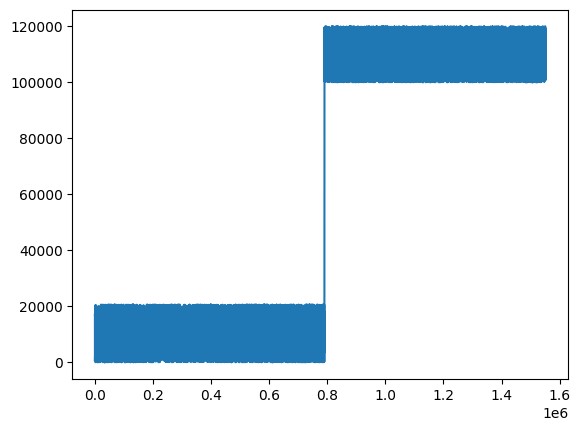

In [6]:
plt.plot(df.Patient_ID)

In [7]:
(df.isnull().sum()/len(df)).sort_values(ascending=False)

Bilirubin_direct    0.998074
Fibrinogen          0.993402
TroponinI           0.990477
Bilirubin_total     0.985092
Alkalinephos        0.983932
AST                 0.983776
Lactate             0.973299
PTT                 0.970559
SaO2                0.965494
EtCO2               0.962868
Phosphate           0.959863
HCO3                0.958106
Chloride            0.954603
BaseExcess          0.945790
PaCO2               0.944401
Calcium             0.941161
Platelets           0.940595
Creatinine          0.939044
Magnesium           0.936896
WBC                 0.935932
BUN                 0.931344
pH                  0.930697
Hgb                 0.926176
FiO2                0.916658
Hct                 0.911460
Potassium           0.906891
Glucose             0.828943
Temp                0.661627
Unit2               0.394251
Unit1               0.394251
DBP                 0.313459
Resp                0.153546
SBP                 0.145770
O2Sat               0.130611
MAP           

In [8]:
df.head(150)

,Unnamed: 0,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,1,0,17072
1,1,1,65.0,100.0,NaN,NaN,72.00,NaN,16.5,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,2,0,17072
2,2,2,78.0,100.0,NaN,NaN,42.50,NaN,NaN,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,3,0,17072
3,3,3,73.0,100.0,NaN,NaN,NaN,NaN,17.0,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,4,0,17072
4,4,4,70.0,100.0,NaN,129.0,74.00,69.0,14.0,NaN,...,NaN,330.0,68.54,0,NaN,NaN,-0.02,5,0,17072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,14,14,125.0,100.0,NaN,134.0,90.00,NaN,19.0,NaN,...,NaN,NaN,67.00,1,1.0,0.0,-0.01,15,0,8065
146,15,15,114.0,100.0,NaN,139.0,82.33,NaN,17.0,NaN,...,NaN,NaN,67.00,1,1.0,0.0,-0.01,16,0,8065
147,16,16,110.0,100.0,36.94,145.0,106.33,NaN,22.0,NaN,...,NaN,NaN,67.00,1,1.0,0.0,-0.01,17,0,8065
148,17,17,119.0,100.0,NaN,144.0,94.67,NaN,21.0,NaN,...,NaN,NaN,67.00,1,1.0,0.0,-0.01,18,0,8065


In [9]:
#df.iloc[250:310]

# To VS for Code code for data loading 

In [10]:
#df = pd.read_csv('./raw_data/Dataset.csv')

# Code for Data Preparation

In [11]:
features = df.columns.tolist()
features

['Unnamed: 0',
 'Hour',
 'HR',
 'O2Sat',
 'Temp',
 'SBP',
 'MAP',
 'DBP',
 'Resp',
 'EtCO2',
 'BaseExcess',
 'HCO3',
 'FiO2',
 'pH',
 'PaCO2',
 'SaO2',
 'AST',
 'BUN',
 'Alkalinephos',
 'Calcium',
 'Chloride',
 'Creatinine',
 'Bilirubin_direct',
 'Glucose',
 'Lactate',
 'Magnesium',
 'Phosphate',
 'Potassium',
 'Bilirubin_total',
 'TroponinI',
 'Hct',
 'Hgb',
 'PTT',
 'WBC',
 'Fibrinogen',
 'Platelets',
 'Age',
 'Gender',
 'Unit1',
 'Unit2',
 'HospAdmTime',
 'ICULOS',
 'SepsisLabel',
 'Patient_ID']

In [12]:
#features to drop in the dataset

columns_drop = ['Unnamed: 0','EtCO2','BaseExcess', 'HCO3','pH','PaCO2','Alkalinephos', 'Calcium','Magnesium',
  'Phosphate','Potassium','PTT','Fibrinogen','Unit1','Unit2']

columns_for_baseline = ['Hour', 'HR','O2Sat', 'Temp','SBP', 'MAP', 'DBP', 'Resp', 'EtCO2','Age','Gender','Patient_ID','SepsisLabel']

In [13]:
df1 = df[columns_for_baseline]

In [14]:
df1

,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,Age,Gender,Patient_ID,SepsisLabel
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.54,0,17072,0
1,1,65.0,100.0,NaN,NaN,72.0,NaN,16.5,NaN,68.54,0,17072,0
2,2,78.0,100.0,NaN,NaN,42.5,NaN,NaN,NaN,68.54,0,17072,0
3,3,73.0,100.0,NaN,NaN,NaN,NaN,17.0,NaN,68.54,0,17072,0
4,4,70.0,100.0,NaN,129.0,74.0,69.0,14.0,NaN,68.54,0,17072,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1552205,21,83.0,99.0,NaN,121.0,77.0,54.0,22.0,NaN,88.00,0,113911,0
1552206,22,80.0,92.0,NaN,102.0,73.0,51.0,24.0,NaN,88.00,0,113911,0
1552207,23,95.0,97.0,36.7,128.5,83.0,58.5,25.0,NaN,88.00,0,113911,0
1552208,24,104.0,99.0,NaN,127.0,85.0,59.0,24.0,NaN,88.00,0,113911,0


In [15]:
(df1.isnull().sum()/len(df1)).sort_values(ascending=False)

EtCO2          0.962868
Temp           0.661627
DBP            0.313459
Resp           0.153546
SBP            0.145770
O2Sat          0.130611
MAP            0.124513
HR             0.098826
Hour           0.000000
Age            0.000000
Gender         0.000000
Patient_ID     0.000000
SepsisLabel    0.000000
dtype: float64

In [16]:
# Fill NaN values with the next available value
df_filled = df1.bfill().ffill()

# By doing this bfill we are merging values from previous patients to new patients so to improve in future verisons!!!

In [17]:
(df_filled.isnull().sum()/len(df_filled)).sort_values(ascending=False)

Hour           0.0
HR             0.0
O2Sat          0.0
Temp           0.0
SBP            0.0
MAP            0.0
DBP            0.0
Resp           0.0
EtCO2          0.0
Age            0.0
Gender         0.0
Patient_ID     0.0
SepsisLabel    0.0
dtype: float64

In [18]:
df_encoded = df_filled

In [19]:
df_encoded

,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,Age,Gender,Patient_ID,SepsisLabel
0,0,65.0,100.0,35.78,129.0,72.0,69.0,16.5,34.0,68.54,0,17072,0
1,1,65.0,100.0,35.78,129.0,72.0,69.0,16.5,34.0,68.54,0,17072,0
2,2,78.0,100.0,35.78,129.0,42.5,69.0,17.0,34.0,68.54,0,17072,0
3,3,73.0,100.0,35.78,129.0,74.0,69.0,17.0,34.0,68.54,0,17072,0
4,4,70.0,100.0,35.78,129.0,74.0,69.0,14.0,34.0,68.54,0,17072,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1552205,21,83.0,99.0,36.70,121.0,77.0,54.0,22.0,42.0,88.00,0,113911,0
1552206,22,80.0,92.0,36.70,102.0,73.0,51.0,24.0,42.0,88.00,0,113911,0
1552207,23,95.0,97.0,36.70,128.5,83.0,58.5,25.0,42.0,88.00,0,113911,0
1552208,24,104.0,99.0,36.70,127.0,85.0,59.0,24.0,42.0,88.00,0,113911,0


In [20]:
(df_encoded['SepsisLabel'].value_counts()/len(df_encoded)).sort_values(ascending=False)

SepsisLabel
0    0.982015
1    0.017985
Name: count, dtype: float64

In [21]:
# List of columns to plot
columns_to_scale = ['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2', 'Age']

In [22]:
# # Plot histograms with KDE for each variable
# for column in columns_to_scale:
#     plt.figure(figsize=(10, 6))

#     # Create histogram with KDE for the variable
#     sns.histplot(df_encoded[column], kde=True, bins=100, color='skyblue', label=f'Histogram of {column}')

#     # Adding labels and title
#     plt.xlabel(column)
#     plt.ylabel('Frequency')
#     plt.title(f'Histogram and KDE of {column}')
#     plt.legend()
#     plt.show()

# After checking the histograms we can see that:

-'HR' has normal distribution

-'O2Sat' is not normal and is squeeed to the right

-'Temp' is normal

-'SBP' is normal

-'MAP' is normal

-'DBP' is normal

-'Resp' is normal

-'EtCO2' is weird

-'Age' is normal squeeded to the right


In [23]:
df_encoded

,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,Age,Gender,Patient_ID,SepsisLabel
0,0,65.0,100.0,35.78,129.0,72.0,69.0,16.5,34.0,68.54,0,17072,0
1,1,65.0,100.0,35.78,129.0,72.0,69.0,16.5,34.0,68.54,0,17072,0
2,2,78.0,100.0,35.78,129.0,42.5,69.0,17.0,34.0,68.54,0,17072,0
3,3,73.0,100.0,35.78,129.0,74.0,69.0,17.0,34.0,68.54,0,17072,0
4,4,70.0,100.0,35.78,129.0,74.0,69.0,14.0,34.0,68.54,0,17072,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1552205,21,83.0,99.0,36.70,121.0,77.0,54.0,22.0,42.0,88.00,0,113911,0
1552206,22,80.0,92.0,36.70,102.0,73.0,51.0,24.0,42.0,88.00,0,113911,0
1552207,23,95.0,97.0,36.70,128.5,83.0,58.5,25.0,42.0,88.00,0,113911,0
1552208,24,104.0,99.0,36.70,127.0,85.0,59.0,24.0,42.0,88.00,0,113911,0


# Standarize the values

In [24]:
# Initialize the scalers
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Apply MinMaxScaler to the O2Sat column
df_encoded['O2Sat'] = min_max_scaler.fit_transform(df_encoded[['O2Sat']])

# Apply StandardScaler to the rest of the columns
columns_to_standardize = [col for col in columns_to_scale if col != 'O2Sat']
df_encoded[columns_to_standardize] = standard_scaler.fit_transform(df_encoded[columns_to_standardize])


In [25]:
df_encoded.head(50)

,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,Age,Gender,Patient_ID,SepsisLabel
0,0,-1.119298,1.0000,-1.454293,0.217460,-0.656979,0.379856,-0.417017,0.096771,0.398538,0,17072,0
1,1,-1.119298,1.0000,-1.454293,0.217460,-0.656979,0.379856,-0.417017,0.096771,0.398538,0,17072,0
2,2,-0.371409,1.0000,-1.454293,0.217460,-2.451894,0.379856,-0.319901,0.096771,0.398538,0,17072,0
3,3,-0.659059,1.0000,-1.454293,0.217460,-0.535289,0.379856,-0.319901,0.096771,0.398538,0,17072,0
4,4,-0.831649,1.0000,-1.454293,0.217460,-0.535289,0.379856,-0.902597,0.096771,0.398538,0,17072,0
5,5,-1.291888,1.0000,-1.454293,0.002762,0.134001,-0.199709,-0.902597,0.096771,0.398538,0,17072,0
6,6,-1.349418,1.0000,-1.454293,-0.984851,-0.474445,-0.417046,-0.902597,0.096771,0.398538,0,17072,0
7,7,-0.946708,1.0000,-1.454293,0.775676,0.651180,1.031866,-0.514133,0.096771,0.398538,0,17072,0
8,8,-0.774119,1.0000,-0.625094,-0.126057,-0.535289,1.973660,-0.902597,0.096771,0.398538,0,17072,0
9,9,-0.889178,1.0000,-0.625094,-0.168997,-0.231066,2.480779,-0.902597,0.096771,0.398538,0,17072,0


# Balancing Dataset

In [26]:
(df_encoded['SepsisLabel'].value_counts()/len(df_encoded)).sort_values(ascending=False)

SepsisLabel
0    0.982015
1    0.017985
Name: count, dtype: float64

In [27]:
# Filter patient IDs where at some point sepsis label is 1
sepsis_patients_ids = list(set(df_encoded.loc[df_encoded['SepsisLabel'] == 1, 'Patient_ID'].tolist()))

In [28]:
# Get unique Patient_IDs from df_encoded
all_patient_ids = set(df_encoded['Patient_ID'])
# Find Patient_IDs not in sepsis_patients_ids
no_sepsis_patients_ids = list(all_patient_ids - set(sepsis_patients_ids))

In [29]:
#Now we have the list with the ID's with patients that had sepsis and patients which doesn't
len(sepsis_patients_ids), len(no_sepsis_patients_ids)

(2932, 37404)

In [30]:
non_sepsis_selected_patients_ids = random.sample(no_sepsis_patients_ids, 4000)

In [31]:
non_sepsis_selected_df = df_encoded.loc[df_encoded['Patient_ID'].isin(non_sepsis_selected_patients_ids)]
sepsis_selected_df = df_encoded.loc[df_encoded['Patient_ID'].isin(sepsis_patients_ids)]

In [32]:
sepsis_selected_df

,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,Age,Gender,Patient_ID,SepsisLabel
235,0,-0.428939,1.00000,-1.005710,-1.156609,-3.425408,0.307410,0.457027,0.096771,-0.166571,1,11093,0
236,1,-0.745354,0.96875,-1.005710,-1.156609,0.042734,0.307410,-0.417017,0.096771,-0.166571,1,11093,0
237,2,-0.313879,1.00000,-1.005710,-0.770152,0.255691,0.597193,0.408469,0.096771,-0.166571,1,11093,0
238,3,-1.349418,1.00000,-1.005710,1.162133,0.742447,1.901214,-0.514133,0.096771,-0.166571,1,11093,0
239,4,-2.039777,1.00000,-1.005710,0.904495,0.559914,1.466540,0.262795,0.096771,-0.166571,1,11093,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551371,5,-1.723363,0.98125,0.475973,-0.834562,-0.535289,-0.634383,0.262795,-0.231583,0.243530,1,119010,1
1551372,6,-1.752128,0.95000,-0.611501,-0.512514,-0.535289,-0.851720,0.262795,0.490796,0.243530,1,119010,1
1551373,7,-0.975473,0.95625,-0.611501,-0.254876,-0.352756,-0.634383,0.262795,0.622138,0.243530,1,119010,1
1551374,8,-1.004238,0.95000,-0.611501,-0.362226,-0.413600,-0.598160,0.262795,0.819151,0.243530,1,119010,1


In [119]:
final_df = pd.concat([non_sepsis_selected_df,sepsis_selected_df])

In [120]:
final_df

,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,Age,Gender,Patient_ID,SepsisLabel
481,0,0.203891,1.00000,-3.058317,-0.405165,0.438224,0.560970,-1.679524,0.096771,-0.09700,0,1380,0
482,1,0.203891,1.00000,-2.650514,-0.340756,0.499069,0.814529,-1.679524,0.096771,-0.09700,0,1380,0
483,2,0.203891,1.00000,-1.087271,-0.480310,0.164424,0.560970,-1.485292,0.096771,-0.09700,0,1380,0
484,3,0.203891,0.99375,0.068171,-0.469575,0.407802,0.905086,-1.193944,0.096771,-0.09700,0,1380,0
485,4,0.146361,1.00000,0.204105,-0.705743,0.316535,0.959421,-1.096828,0.096771,-0.09700,0,1380,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551371,5,-1.723363,0.98125,0.475973,-0.834562,-0.535289,-0.634383,0.262795,-0.231583,0.24353,1,119010,1
1551372,6,-1.752128,0.95000,-0.611501,-0.512514,-0.535289,-0.851720,0.262795,0.490796,0.24353,1,119010,1
1551373,7,-0.975473,0.95625,-0.611501,-0.254876,-0.352756,-0.634383,0.262795,0.622138,0.24353,1,119010,1
1551374,8,-1.004238,0.95000,-0.611501,-0.362226,-0.413600,-0.598160,0.262795,0.819151,0.24353,1,119010,1


In [129]:
patient_ids = final_df['Patient_ID'].unique()
np.random.shuffle(patient_ids)


In [130]:
patient_ids

array([ 12619, 104025, 113892, ...,  11173, 113334,  14614])

In [173]:
final_df.Patient_ID = final_df.Patient_ID.astype("category")
final_df.Patient_ID = final_df.Patient_ID.cat.set_categories(patient_ids)
final_df_shuffled = final_df.sort_values(["Patient_ID","Hour"]).set_index('Patient_ID')  ## 'sort' changed to 'patient_ids'

In [174]:
final_df_shuffled

,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,Age,Gender,SepsisLabel
Patient_ID,,,,,,,,,,,,
12619,0,1.872259,0.9625,-1.916470,4.983763,3.602144,3.639909,0.068563,0.096771,0.250243,1,0
12619,1,0.721660,1.0000,-1.916470,1.462710,2.020184,1.828768,-1.291060,0.096771,0.250243,1,0
12619,2,0.318950,1.0000,-1.916470,0.775676,1.168360,1.176758,0.651258,0.096771,0.250243,1,0
12619,3,-0.946708,1.0000,-1.916470,1.849167,2.446096,2.118551,0.651258,0.096771,0.250243,1,0
12619,4,-1.406948,1.0000,-1.916470,2.214155,2.872009,2.589447,0.651258,0.096771,0.250243,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
14614,168,1.584609,0.9625,2.841229,-0.426635,-0.961202,-0.489492,0.651258,0.096771,-2.014466,0,1
14614,169,1.642139,0.9500,2.841229,-0.555454,-0.535289,-0.489492,0.845490,0.096771,-2.014466,0,1
14614,170,1.181900,0.9000,2.841229,-0.898971,-1.143735,-0.489492,0.651258,0.096771,-2.014466,0,1


# 1rst Approach: Tabular Data Shifting

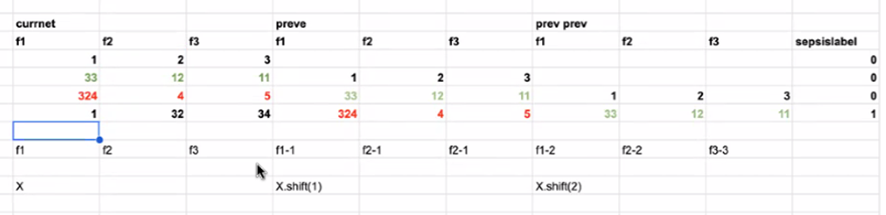

In [177]:
features_df = final_df_shuffled.drop(columns = ['Hour','Age','Gender','SepsisLabel'])
to_add_df = final_df_shuffled[['Hour','Age','Gender','SepsisLabel']]

In [178]:
balanced_shifted_df = pd.concat([

                    features_df,
                    features_df.groupby(features_df.index).shift(1).add_suffix('_1'),
                    features_df.groupby(features_df.index).shift(2).add_suffix('_2'),
                    features_df.groupby(features_df.index).shift(3).add_suffix('_3'),
                    features_df.groupby(features_df.index).shift(4).add_suffix('_4'),
                    features_df.groupby(features_df.index).shift(5).add_suffix('_5'),
                    to_add_df],
                    axis=1
)

/tmp/ipykernel_2094/3567530738.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  features_df.groupby(features_df.index).shift(1).add_suffix('_1'),
/tmp/ipykernel_2094/3567530738.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  features_df.groupby(features_df.index).shift(2).add_suffix('_2'),
/tmp/ipykernel_2094/3567530738.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  features_df.groupby(features_df.index).shif

In [ ]:
pd.set_option('display.max_columns', None)

In [179]:
balanced_shifted_df

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,HR_1,O2Sat_1,Temp_1,SBP_1,MAP_1,DBP_1,Resp_1,EtCO2_1,HR_2,O2Sat_2,Temp_2,SBP_2,MAP_2,DBP_2,Resp_2,EtCO2_2,HR_3,O2Sat_3,Temp_3,SBP_3,MAP_3,DBP_3,Resp_3,EtCO2_3,HR_4,O2Sat_4,Temp_4,SBP_4,MAP_4,DBP_4,Resp_4,EtCO2_4,HR_5,O2Sat_5,Temp_5,SBP_5,MAP_5,DBP_5,Resp_5,EtCO2_5,Hour,Age,Gender,SepsisLabel
Patient_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12619,1.872259,0.9625,-1.916470,4.983763,3.602144,3.639909,0.068563,0.096771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.250243,1,0
12619,0.721660,1.0000,-1.916470,1.462710,2.020184,1.828768,-1.291060,0.096771,1.872259,0.9625,-1.916470,4.983763,3.602144,3.639909,0.068563,0.096771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0.250243,1,0
12619,0.318950,1.0000,-1.916470,0.775676,1.168360,1.176758,0.651258,0.096771,0.721660,1.0000,-1.916470,1.462710,2.020184,1.828768,-1.291060,0.096771,1.872259,0.9625,-1.916470,4.983763,3.602144,3.639909,0.068563,0.096771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0.250243,1,0
12619,-0.946708,1.0000,-1.916470,1.849167,2.446096,2.118551,0.651258,0.096771,0.318950,1.0000,-1.916470,0.775676,1.168360,1.176758,0.651258,0.096771,0.721660,1.0000,-1.916470,1.462710,2.020184,1.828768,-1.291060,0.096771,1.872259,0.96250,-1.916470,4.983763,3.602144,3.639909,0.068563,0.096771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,0.250243,1,0
12619,-1.406948,1.0000,-1.916470,2.214155,2.872009,2.589447,0.651258,0.096771,-0.946708,1.0000,-1.916470,1.849167,2.446096,2.118551,0.651258,0.096771,0.318950,1.0000,-1.916470,0.775676,1.168360,1.176758,0.651258,0.096771,0.721660,1.00000,-1.916470,1.462710,2.020184,1.828768,-1.291060,0.096771,1.872259,0.96250,-1.916470,4.983763,3.602144,3.639909,0.068563,0.096771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0.250243,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14614,1.584609,0.9625,2.841229,-0.426635,-0.961202,-0.489492,0.651258,0.096771,1.872259,0.9625,2.841229,-0.426635,-0.961202,-0.489492,0.845490,0.096771,2.447558,0.8875,2.841229,0.518038,0.864137,0.886975,0.845490,0.096771,1.843494,0.91875,2.841229,0.539507,0.346957,1.212980,0.942606,0.096771,1.757199,0.94375,1.862503,0.539507,0.742447,1.611431,0.359911,0.096771,1.987319,0.91250,2.324679,0.571712,0.803292,1.285426,0.651258,0.096771,168,-2.014466,0,1
14614,1.642139,0.9500,2.841229,-0.555454,-0.535289,-0.489492,0.845490,0.096771,1.584609,0.9625,2.841229,-0.426635,-0.961202,-0.489492,0.651258,0.096771,1.872259,0.9625,2.841229,-0.426635,-0.961202,-0.489492,0.845490,0.096771,2.447558,0.88750,2.841229,0.518038,0.864137,0.886975,0.845490,0.096771,1.843494,0.91875,2.841229,0.539507,0.346957,1.212980,0.942606,0.096771,1.757199,0.94375,1.862503,0.539507,0.742447,1.611431,0.359911,0.096771,169,-2.014466,0,1
14614,1.181900,0.9000,2.841229,-0.898971,-1.143735,-0.489492,0.651258,0.096771,1.642139,0.9500,2.841229,-0.555454,-0.535289,-0.489492,0.845490,0.096771,1.584609,0.9625,2.841229,-0.426635,-0.961202,-0.489492,0.651258,0.096771,1.872259,0.96250,2.841229,-0.426635,-0.961202,-0.489492,0.845490,0.096771,2.447558,0.88750,2.841229,0.518038,0.864137,0.886975,0.845490,0.096771,1.843494,0.91875,2.841229,0.539507,0.346957,1.212980,0.942606,0.096771,170,-2.014466,0,1


In [181]:
balanced_shifted_cleaned_df = balanced_shifted_df.dropna()

In [182]:
balanced_shifted_cleaned_df

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,HR_1,O2Sat_1,Temp_1,SBP_1,MAP_1,DBP_1,Resp_1,EtCO2_1,HR_2,O2Sat_2,Temp_2,SBP_2,MAP_2,DBP_2,Resp_2,EtCO2_2,HR_3,O2Sat_3,Temp_3,SBP_3,MAP_3,DBP_3,Resp_3,EtCO2_3,HR_4,O2Sat_4,Temp_4,SBP_4,MAP_4,DBP_4,Resp_4,EtCO2_4,HR_5,O2Sat_5,Temp_5,SBP_5,MAP_5,DBP_5,Resp_5,EtCO2_5,Hour,Age,Gender,SepsisLabel
Patient_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12619,-1.406948,0.9875,-1.916470,0.432158,0.894559,1.031866,0.651258,0.096771,-1.406948,1.0000,-1.916470,2.214155,2.872009,2.589447,0.651258,0.096771,-0.946708,1.0000,-1.916470,1.849167,2.446096,2.118551,0.651258,0.096771,0.318950,1.00000,-1.916470,0.775676,1.168360,1.176758,0.651258,0.096771,0.721660,1.00000,-1.916470,1.462710,2.020184,1.828768,-1.291060,0.096771,1.872259,0.96250,-1.916470,4.983763,3.602144,3.639909,0.068563,0.096771,5,0.250243,1,0
12619,-1.464478,1.0000,-1.916470,0.088641,0.377380,0.524747,0.651258,0.096771,-1.406948,0.9875,-1.916470,0.432158,0.894559,1.031866,0.651258,0.096771,-1.406948,1.0000,-1.916470,2.214155,2.872009,2.589447,0.651258,0.096771,-0.946708,1.00000,-1.916470,1.849167,2.446096,2.118551,0.651258,0.096771,0.318950,1.00000,-1.916470,0.775676,1.168360,1.176758,0.651258,0.096771,0.721660,1.00000,-1.916470,1.462710,2.020184,1.828768,-1.291060,0.096771,6,0.250243,1,0
12619,-1.579538,1.0000,-1.916470,0.260400,0.559914,0.597193,0.651258,0.096771,-1.464478,1.0000,-1.916470,0.088641,0.377380,0.524747,0.651258,0.096771,-1.406948,0.9875,-1.916470,0.432158,0.894559,1.031866,0.651258,0.096771,-1.406948,1.00000,-1.916470,2.214155,2.872009,2.589447,0.651258,0.096771,-0.946708,1.00000,-1.916470,1.849167,2.446096,2.118551,0.651258,0.096771,0.318950,1.00000,-1.916470,0.775676,1.168360,1.176758,0.651258,0.096771,7,0.250243,1,0
12619,-1.809658,1.0000,-1.916470,-0.040178,0.316535,0.379856,0.651258,0.096771,-1.579538,1.0000,-1.916470,0.260400,0.559914,0.597193,0.651258,0.096771,-1.464478,1.0000,-1.916470,0.088641,0.377380,0.524747,0.651258,0.096771,-1.406948,0.98750,-1.916470,0.432158,0.894559,1.031866,0.651258,0.096771,-1.406948,1.00000,-1.916470,2.214155,2.872009,2.589447,0.651258,0.096771,-0.946708,1.00000,-1.916470,1.849167,2.446096,2.118551,0.651258,0.096771,8,0.250243,1,0
12619,-1.982247,1.0000,-1.916470,0.174520,0.681603,0.597193,0.651258,0.096771,-1.809658,1.0000,-1.916470,-0.040178,0.316535,0.379856,0.651258,0.096771,-1.579538,1.0000,-1.916470,0.260400,0.559914,0.597193,0.651258,0.096771,-1.464478,1.00000,-1.916470,0.088641,0.377380,0.524747,0.651258,0.096771,-1.406948,0.98750,-1.916470,0.432158,0.894559,1.031866,0.651258,0.096771,-1.406948,1.00000,-1.916470,2.214155,2.872009,2.589447,0.651258,0.096771,9,0.250243,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14614,1.584609,0.9625,2.841229,-0.426635,-0.961202,-0.489492,0.651258,0.096771,1.872259,0.9625,2.841229,-0.426635,-0.961202,-0.489492,0.845490,0.096771,2.447558,0.8875,2.841229,0.518038,0.864137,0.886975,0.845490,0.096771,1.843494,0.91875,2.841229,0.539507,0.346957,1.212980,0.942606,0.096771,1.757199,0.94375,1.862503,0.539507,0.742447,1.611431,0.359911,0.096771,1.987319,0.91250,2.324679,0.571712,0.803292,1.285426,0.651258,0.096771,168,-2.014466,0,1
14614,1.642139,0.9500,2.841229,-0.555454,-0.535289,-0.489492,0.845490,0.096771,1.584609,0.9625,2.841229,-0.426635,-0.961202,-0.489492,0.651258,0.096771,1.872259,0.9625,2.841229,-0.426635,-0.961202,-0.489492,0.845490,0.096771,2.447558,0.88750,2.841229,0.518038,0.864137,0.886975,0.845490,0.096771,1.843494,0.91875,2.841229,0.539507,0.346957,1.212980,0.942606,0.096771,1.757199,0.94375,1.862503,0.539507,0.742447,1.611431,0.359911,0.096771,169,-2.014466,0,1
14614,1.181900,0.9000,2.841229,-0.898971,-1.143735,-0.489492,0.651258,0.096771,1.642139,0.9500,2.841229,-0.555454,-0.535289,-0.489492,0.845490,0.096771,1.584609,0.9625,2.841229,-0.426635,-0.961202,-0.489492,

# Data Split

In [183]:
# Split the data into training and testing sets, we have 5545 patients for train and 1386 for test so a total of 1386 + 5545 = 6931 patients
split_point = int(0.8 * len(patient_ids))  # 80% train, 20% test
split_point

5545

In [112]:
int(0.2 * len(patient_ids))

1386

In [90]:
1386 + 5545

6931

In [184]:
train_ids = patient_ids[:split_point]
test_ids = patient_ids[split_point:]

In [185]:
train_df = balanced_shifted_cleaned_df.loc[balanced_shifted_cleaned_df.index.isin(train_ids)]
test_df = balanced_shifted_cleaned_df.loc[balanced_shifted_cleaned_df.index.isin(test_ids)]


In [186]:
train_df

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,HR_1,O2Sat_1,Temp_1,SBP_1,MAP_1,DBP_1,Resp_1,EtCO2_1,HR_2,O2Sat_2,Temp_2,SBP_2,MAP_2,DBP_2,Resp_2,EtCO2_2,HR_3,O2Sat_3,Temp_3,SBP_3,MAP_3,DBP_3,Resp_3,EtCO2_3,HR_4,O2Sat_4,Temp_4,SBP_4,MAP_4,DBP_4,Resp_4,EtCO2_4,HR_5,O2Sat_5,Temp_5,SBP_5,MAP_5,DBP_5,Resp_5,EtCO2_5,Hour,Age,Gender,SepsisLabel
Patient_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12619,-1.406948,0.9875,-1.916470,0.432158,0.894559,1.031866,0.651258,0.096771,-1.406948,1.0000,-1.916470,2.214155,2.872009,2.589447,0.651258,0.096771,-0.946708,1.0000,-1.916470,1.849167,2.446096,2.118551,0.651258,0.096771,0.318950,1.0000,-1.916470,0.775676,1.168360,1.176758,0.651258,0.096771,0.721660,1.0000,-1.916470,1.462710,2.020184,1.828768,-1.291060,0.096771,1.872259,0.9625,-1.916470,4.983763,3.602144,3.639909,0.068563,0.096771,5,0.250243,1,0
12619,-1.464478,1.0000,-1.916470,0.088641,0.377380,0.524747,0.651258,0.096771,-1.406948,0.9875,-1.916470,0.432158,0.894559,1.031866,0.651258,0.096771,-1.406948,1.0000,-1.916470,2.214155,2.872009,2.589447,0.651258,0.096771,-0.946708,1.0000,-1.916470,1.849167,2.446096,2.118551,0.651258,0.096771,0.318950,1.0000,-1.916470,0.775676,1.168360,1.176758,0.651258,0.096771,0.721660,1.0000,-1.916470,1.462710,2.020184,1.828768,-1.291060,0.096771,6,0.250243,1,0
12619,-1.579538,1.0000,-1.916470,0.260400,0.559914,0.597193,0.651258,0.096771,-1.464478,1.0000,-1.916470,0.088641,0.377380,0.524747,0.651258,0.096771,-1.406948,0.9875,-1.916470,0.432158,0.894559,1.031866,0.651258,0.096771,-1.406948,1.0000,-1.916470,2.214155,2.872009,2.589447,0.651258,0.096771,-0.946708,1.0000,-1.916470,1.849167,2.446096,2.118551,0.651258,0.096771,0.318950,1.0000,-1.916470,0.775676,1.168360,1.176758,0.651258,0.096771,7,0.250243,1,0
12619,-1.809658,1.0000,-1.916470,-0.040178,0.316535,0.379856,0.651258,0.096771,-1.579538,1.0000,-1.916470,0.260400,0.559914,0.597193,0.651258,0.096771,-1.464478,1.0000,-1.916470,0.088641,0.377380,0.524747,0.651258,0.096771,-1.406948,0.9875,-1.916470,0.432158,0.894559,1.031866,0.651258,0.096771,-1.406948,1.0000,-1.916470,2.214155,2.872009,2.589447,0.651258,0.096771,-0.946708,1.0000,-1.916470,1.849167,2.446096,2.118551,0.651258,0.096771,8,0.250243,1,0
12619,-1.982247,1.0000,-1.916470,0.174520,0.681603,0.597193,0.651258,0.096771,-1.809658,1.0000,-1.916470,-0.040178,0.316535,0.379856,0.651258,0.096771,-1.579538,1.0000,-1.916470,0.260400,0.559914,0.597193,0.651258,0.096771,-1.464478,1.0000,-1.916470,0.088641,0.377380,0.524747,0.651258,0.096771,-1.406948,0.9875,-1.916470,0.432158,0.894559,1.031866,0.651258,0.096771,-1.406948,1.0000,-1.916470,2.214155,2.872009,2.589447,0.651258,0.096771,9,0.250243,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7741,1.066840,0.9750,1.155645,-0.941911,-1.143735,-1.069057,-1.096828,0.096771,1.239430,0.9625,1.155645,-0.512514,-0.900357,-0.851720,-1.679524,0.096771,0.894250,0.9625,0.883776,-0.126057,-0.656979,-0.489492,-1.291060,0.096771,0.664130,0.9750,1.155645,0.002762,-0.717823,-0.634383,-1.485292,0.096771,1.469549,0.9625,1.563447,-0.727213,-0.900357,-0.706829,-0.708365,0.096771,0.951780,0.9750,1.427513,1.419771,0.499069,0.307410,-0.708365,0.096771,17,0.973412,1,0
7741,0.836720,0.9625,1.291579,-0.083118,-0.656979,-0.706829,-0.902597,0.096771,1.066840,0.9750,1.155645,-0.941911,-1.143735,-1.069057,-1.096828,0.096771,1.239430,0.9625,1.155645,-0.512514,-0.900357,-0.851720,-1.679524,0.096771,0.894250,0.9625,0.883776,-0.126057,-0.656979,-0.489492,-1.291060,0.096771,0.664130,0.9750,1.155645,0.002762,-0.717823,-0.634383,-1.485292,0.096771,1.469549,0.9625,1.563447,-0.727213,-0.900357,-0.706829,-0.708365,0.096771,18,0.973412,1,0
7741,0.635365,0.9750,1.019710,0.389219,-0.504867,-0.779274,-0.805481,0.096771,0.836720,0.9625,1.291579,-0.083118,-0.656979,-0.706829,-0.902597,0.096771,1.066840,0.9750,1.155645,-0.941911,-1.143735,-1.069057

In [187]:
test_df

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,HR_1,O2Sat_1,Temp_1,SBP_1,MAP_1,DBP_1,Resp_1,EtCO2_1,HR_2,O2Sat_2,Temp_2,SBP_2,MAP_2,DBP_2,Resp_2,EtCO2_2,HR_3,O2Sat_3,Temp_3,SBP_3,MAP_3,DBP_3,Resp_3,EtCO2_3,HR_4,O2Sat_4,Temp_4,SBP_4,MAP_4,DBP_4,Resp_4,EtCO2_4,HR_5,O2Sat_5,Temp_5,SBP_5,MAP_5,DBP_5,Resp_5,EtCO2_5,Hour,Age,Gender,SepsisLabel
Patient_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5317,1.124370,1.0000,1.712975,0.861555,0.985826,1.104312,0.068563,0.096771,1.239430,1.0000,1.712975,1.119193,1.290049,1.538986,-0.125669,0.096771,0.951780,1.0000,2.012030,1.119193,2.202718,1.538986,0.262795,0.096771,0.894250,0.98750,2.012030,1.119193,0.681603,1.538986,-0.125669,0.096771,1.181900,1.00000,2.012030,1.119193,0.559914,1.538986,-0.125669,0.096771,1.210665,1.00000,1.413920,1.119193,0.651180,1.538986,0.165679,0.096771,5,-0.652956,1,1
5317,1.066840,1.0000,1.712975,1.205072,1.290049,1.394094,0.748374,0.096771,1.124370,1.0000,1.712975,0.861555,0.985826,1.104312,0.068563,0.096771,1.239430,1.0000,1.712975,1.119193,1.290049,1.538986,-0.125669,0.096771,0.951780,1.00000,2.012030,1.119193,2.202718,1.538986,0.262795,0.096771,0.894250,0.98750,2.012030,1.119193,0.681603,1.538986,-0.125669,0.096771,1.181900,1.00000,2.012030,1.119193,0.559914,1.538986,-0.125669,0.096771,6,-0.652956,1,1
5317,1.469549,1.0000,1.712975,0.818615,0.742447,0.814529,0.457027,0.096771,1.066840,1.0000,1.712975,1.205072,1.290049,1.394094,0.748374,0.096771,1.124370,1.0000,1.712975,0.861555,0.985826,1.104312,0.068563,0.096771,1.239430,1.00000,1.712975,1.119193,1.290049,1.538986,-0.125669,0.096771,0.951780,1.00000,2.012030,1.119193,2.202718,1.538986,0.262795,0.096771,0.894250,0.98750,2.012030,1.119193,0.681603,1.538986,-0.125669,0.096771,7,-0.652956,1,1
5317,1.527079,0.9750,1.182831,0.131581,0.438224,0.669638,0.262795,0.096771,1.469549,1.0000,1.712975,0.818615,0.742447,0.814529,0.457027,0.096771,1.066840,1.0000,1.712975,1.205072,1.290049,1.394094,0.748374,0.096771,1.124370,1.00000,1.712975,0.861555,0.985826,1.104312,0.068563,0.096771,1.239430,1.00000,1.712975,1.119193,1.290049,1.538986,-0.125669,0.096771,0.951780,1.00000,2.012030,1.119193,2.202718,1.538986,0.262795,0.096771,8,-0.652956,1,1
5317,0.836720,1.0000,1.182831,2.364443,2.506941,2.408333,0.262795,0.096771,1.527079,0.9750,1.182831,0.131581,0.438224,0.669638,0.262795,0.096771,1.469549,1.0000,1.712975,0.818615,0.742447,0.814529,0.457027,0.096771,1.066840,1.00000,1.712975,1.205072,1.290049,1.394094,0.748374,0.096771,1.124370,1.00000,1.712975,0.861555,0.985826,1.104312,0.068563,0.096771,1.239430,1.00000,1.712975,1.119193,1.290049,1.538986,-0.125669,0.096771,9,-0.652956,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14614,1.584609,0.9625,2.841229,-0.426635,-0.961202,-0.489492,0.651258,0.096771,1.872259,0.9625,2.841229,-0.426635,-0.961202,-0.489492,0.845490,0.096771,2.447558,0.8875,2.841229,0.518038,0.864137,0.886975,0.845490,0.096771,1.843494,0.91875,2.841229,0.539507,0.346957,1.212980,0.942606,0.096771,1.757199,0.94375,1.862503,0.539507,0.742447,1.611431,0.359911,0.096771,1.987319,0.91250,2.324679,0.571712,0.803292,1.285426,0.651258,0.096771,168,-2.014466,0,1
14614,1.642139,0.9500,2.841229,-0.555454,-0.535289,-0.489492,0.845490,0.096771,1.584609,0.9625,2.841229,-0.426635,-0.961202,-0.489492,0.651258,0.096771,1.872259,0.9625,2.841229,-0.426635,-0.961202,-0.489492,0.845490,0.096771,2.447558,0.88750,2.841229,0.518038,0.864137,0.886975,0.845490,0.096771,1.843494,0.91875,2.841229,0.539507,0.346957,1.212980,0.942606,0.096771,1.757199,0.94375,1.862503,0.539507,0.742447,1.611431,0.359911,0.096771,169,-2.014466,0,1
14614,1.181900,0.9000,2.841229,-0.898971,-1.143735,-0.489492,0.651258,0.096771,1.642139,0.9500,2.841229,-0.555454,-0.535289,-0.489492,0.845490,0.096771,1.584609,0.9625,2.841229,-0.426635,-0.961202,-0.489492,0.651258,0.096771,1.872259,0.96250,2.841229,-0.4

In [188]:
X_train = train_df.drop('SepsisLabel',axis=1)
y_train = train_df['SepsisLabel']

In [189]:
X_test = test_df.drop('SepsisLabel',axis=1)
y_test = test_df['SepsisLabel']

# 1rst approach model creation 

In [ ]:
X_train = train_df.drop('SepsisLabel',axis=1)
y_train = train_df['SepsisLabel']

X_test = test_df.drop('SepsisLabel',axis=1)
y_test = test_df['SepsisLabel']

In [190]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import recall_score
from sklearn.preprocessing import StandardScaler

In [191]:
# Initialize the Logistic Regression model
model = LogisticRegression(random_state=42, max_iter=100)

# Perform cross-validation and print recall scores
cv_recall_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='recall')
print(f"Cross-Validation Recall Scores: {cv_recall_scores}")
print(f"Mean Cross-Validation Recall Score: {cv_recall_scores.mean()}")

# Train the model on the entire training data
model.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = model.predict(X_test_scaled)

# Evaluate recall on the test data
test_recall = recall_score(y_test, y_pred)
print(f"Test Recall Score: {test_recall}")


: 